In [1]:
import os
from simplecube import local_simple_cube

In [2]:
path_dir = os.path.abspath("")

In [3]:
NDVI_cube = local_simple_cube(
    data_dir=os.path.join(path_dir),
    collection="HLS.v2.0",
    bands=["NDVI"],
    tile="T23LCC",
    bbox="-46.8292,-16.0656,-46.3692,-15.7169",
    source='nasa'
)

NDVI_cube

<xarray.Dataset> Size: 756MB
Dimensions:      (band: 1, x: 1653, y: 1300, time: 88)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 13kB 3.04e+05 3.04e+05 ... 3.535e+05 3.535e+05
  * y            (y) float64 10kB -1.738e+06 -1.738e+06 ... -1.777e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 704B 2019-08-03T13:22:41 ... 2020-07-2...
Data variables:
    band_data    (time, band, y, x) float32 756MB 0.4559 0.5386 ... 0.7195

In [4]:
from wcpms_server import params_phenometrics, phenometrics_data_cube

/home/sansigolo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

In [6]:
ds_phenos = phenometrics_data_cube(
    da=NDVI_cube['band_data'],
    engine='phenolopy',
    config=config
)

ds_phenos

<xarray.Dataset> Size: 172MB
Dimensions:      (band: 1, y: 1300, x: 1653)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 13kB 3.04e+05 3.04e+05 ... 3.535e+05 3.535e+05
  * y            (y) float64 10kB -1.738e+06 -1.738e+06 ... -1.777e+06
    spatial_ref  int32 4B 32623
    time         (band, y, x) datetime64[ns] 17MB 2020-03-03T13:08:29 ... 202...
Data variables: (12/18)
    pos_values   (band, y, x) float32 9MB 0.766 1.027 0.7997 ... 0.996 0.913
    pos_times    (band, y, x) float32 9MB 63.0 63.0 63.0 ... 130.0 130.0 130.0
    mos_values   (band, y, x) float32 9MB 0.6895 1.027 0.6877 ... 0.8449 0.8233
    vos_values   (band, y, x) float32 9MB -0.01696 -0.01729 ... -0.01287
    vos_times    (band, y, x) float32 9MB 55.0 55.0 55.0 55.0 ... 35.0 35.0 35.0
    bse_values   (band, y, x) float32 9MB -0.0002888 -0.01321 ... -0.006865
    ...           ...
    roi_values   (band, y, x) float32 9MB 0.1951 0.2801 ... 0.01519 0.0141
    rod_values   (band, y, x) float32 9MB 0.002467 0.01071 ... 0.009677 0.008989
    lios_values  (band, y, x) float32 9MB 24.01 8.224 1.096 ... 23.15 23.26
    sios_values  (band, y, x) float32 9MB 25.09 8.57 1.143 ... 33.93 23.52 23.73
    liot_values  (band, y, x) float32 9MB 33.81 36.46 37.27 ... 46.69 46.51
    siot_values  (band, y, x) float32 9MB 35.29 37.96 38.63 ... 47.6 47.59 47.63
Attributes:
    grid_mapping:  spatial_ref

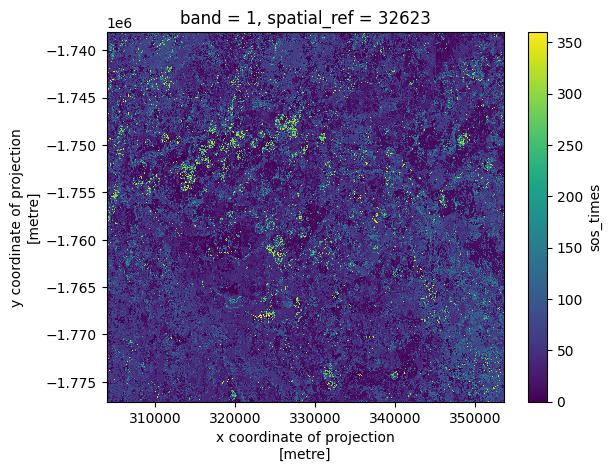

In [7]:
ds_phenos_2d = ds_phenos['sos_times']

ds_phenos_2d.plot()